In [14]:
import numpy as np
import PIL.Image as pilimg

pix_all = []
all_file_dim  = []

for i in range(0,1000):
    filename = '적외선영상_' + str(i+1) + '.png'
    img_path = "../data/fire_20200701_test_2/" + filename
    img = pilimg.open(img_path)
    pix = np.array(img)
    pix = pix/255
    #각각의 차원을 계산
    dim = pix.shape
    all_file_dim.append(dim)
    width , height = pix.shape
    pix2 = np.zeros((200, 200))

    pix2[:width,:height] = pix
    pix2 = pix2.reshape(200,200,1)
    pix_all.append(pix2)
    arr_pix_all = np.asarray(pix_all)

In [15]:
arr_pix_all.shape

(1000, 200, 200, 1)

In [16]:
arr_pix_all.ndim

4

In [18]:
import pandas as pd
temp = pd.read_csv('../data/온도.csv')

In [19]:
x_train = arr_pix_all[1:601]
x_val = arr_pix_all[601:901]
x_test = arr_pix_all[901:1001]

In [20]:
y_train = temp['온도'].iloc[1:601]
y_val = temp['온도'].iloc[601:901]
y_test = temp['온도'].iloc[901:1001]

In [21]:
y_test = y_test.values.reshape(99,1)

In [22]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, batch_size=32, epochs=30, validation_data=(x_val, y_val))

# 5. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

Using TensorFlow backend.


Epoch 1/30
19/19 [==============================] - 12s 613ms/step - loss: 229.0981 - val_loss: 62.4645
Epoch 2/30
19/19 [==============================] - 12s 637ms/step - loss: 53.4864 - val_loss: 48.3715
Epoch 3/30
19/19 [==============================] - 11s 602ms/step - loss: 40.9287 - val_loss: 47.0926
Epoch 4/30
19/19 [==============================] - 11s 600ms/step - loss: 39.2650 - val_loss: 48.0230
Epoch 5/30
19/19 [==============================] - 12s 605ms/step - loss: 35.5216 - val_loss: 44.8035
Epoch 6/30
19/19 [==============================] - 11s 604ms/step - loss: 34.2465 - val_loss: 46.0291
Epoch 7/30
19/19 [==============================] - 11s 598ms/step - loss: 32.1105 - val_loss: 44.5330
Epoch 8/30
19/19 [==============================] - 11s 603ms/step - loss: 30.1220 - val_loss: 44.3329
Epoch 9/30
19/19 [==============================] - 11s 599ms/step - loss: 28.5541 - val_loss: 44.8523
Epoch 10/30
19/19 [==============================] - 11s 602ms/step - lo

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               18874624  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

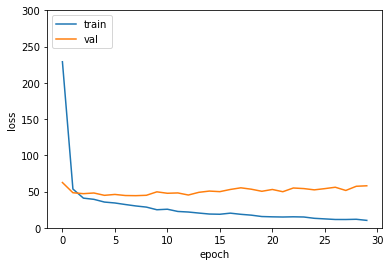

In [24]:
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

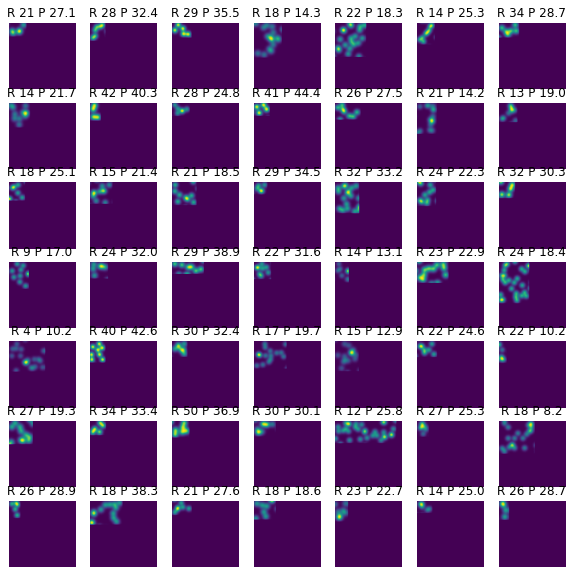

In [25]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 7
plt_col = 7

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(200, 200))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()